In [66]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the MNIST dataset

In [67]:
from keras.datasets.mnist import load_data

In [68]:
## load_data -- return value is two tuples train_test
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)

(60000, 28, 28)


There are 60000 images in the training data.Each image size is 28*28

In [69]:
print(test_digits.shape)

(10000, 28, 28)


There are 10 classes from class 0 to class 9

In [70]:
print(train_labels.shape)

(60000,)


Class Wise images count

In [71]:
type(train_labels)

numpy.ndarray

In [72]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [73]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

EDA

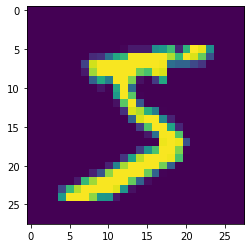

In [74]:
plt.imshow(train_digits[0])

Text(0.5, 1.0, 'Digit 5')

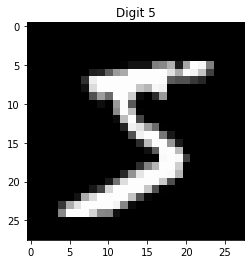

In [75]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit "+str(train_labels[0]))

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

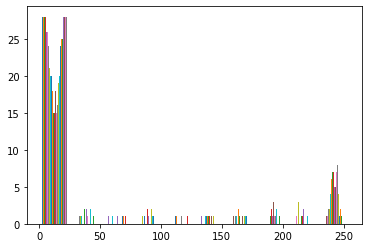

In [76]:
plt.hist(train_digits[0])

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

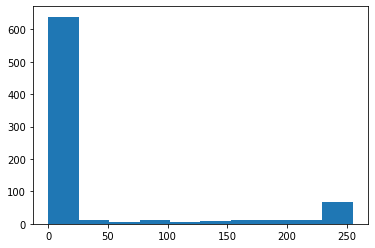

In [77]:
plt.hist(train_digits[0].flat)

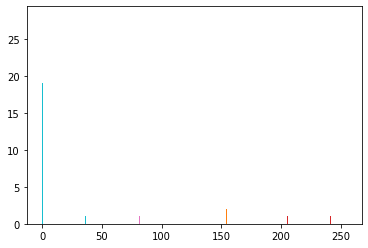

In [78]:
plt.hist(train_digits[0],bins=255)
plt.show()

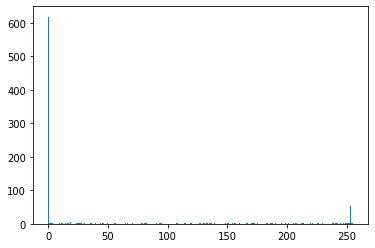

In [79]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

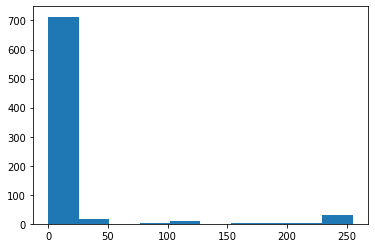

In [80]:
# Pixel distribution for digit 1
plt.hist(train_digits[14].flat)

In [81]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [82]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

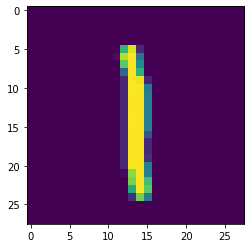

In [83]:
plt.imshow(train_digits[14])

In [84]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([ 3502, 45737, 34583, 42648, 18659, 59434,  1133, 36620,  4013,
        2838, 19327, 38104, 49833, 25696, 17207, 51812])

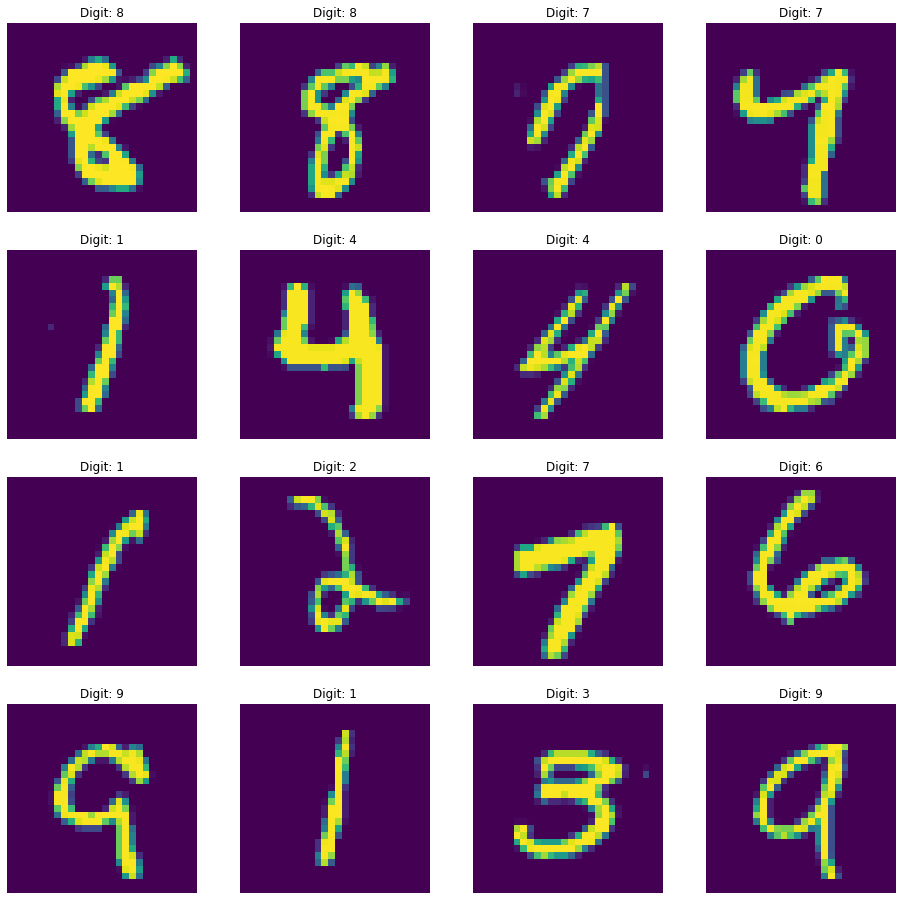

In [85]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis("off")
  j+=1

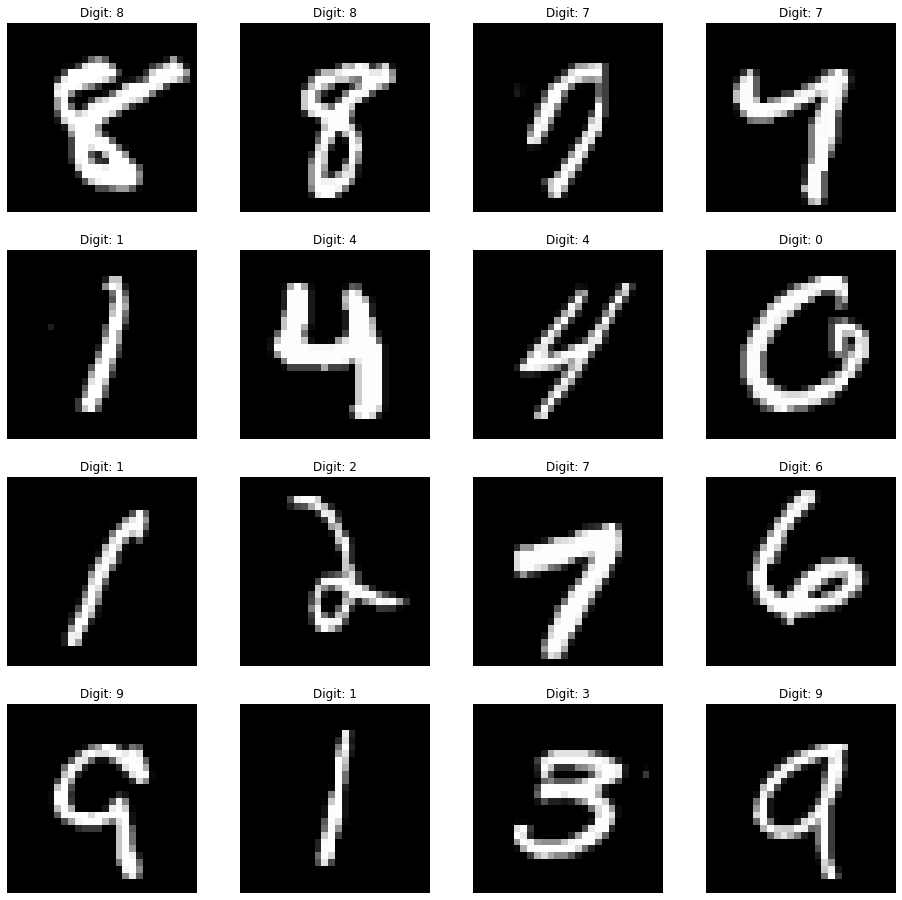

In [86]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis("off")
  j+=1

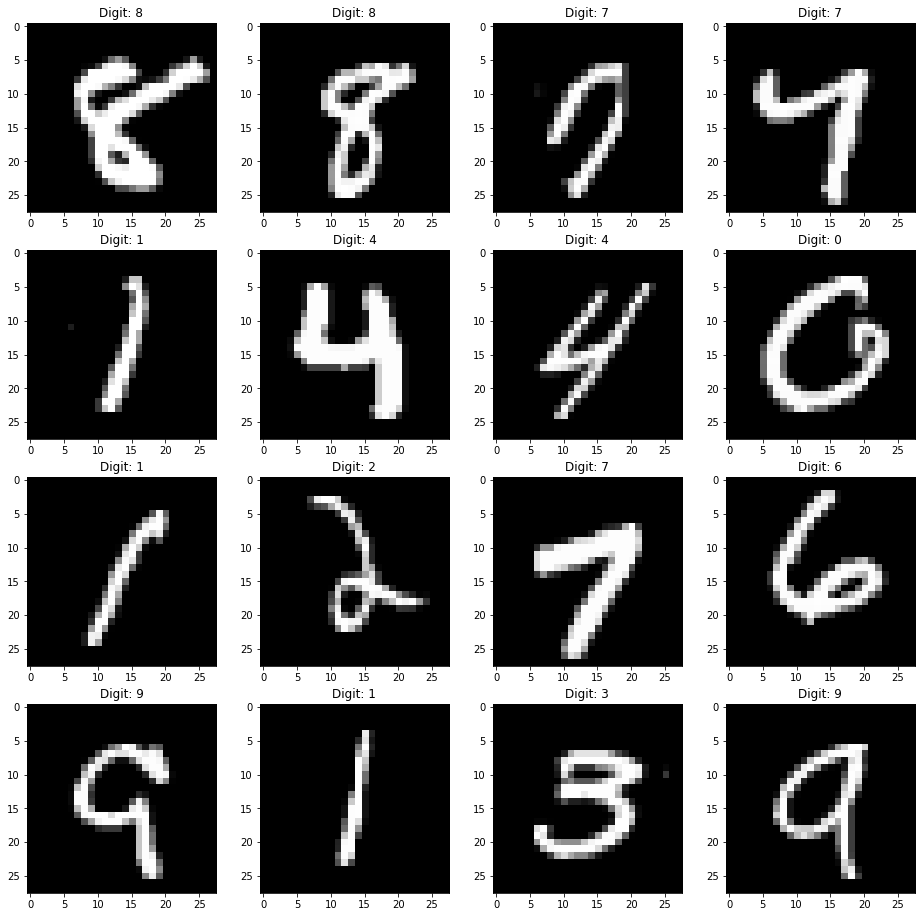

In [87]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit: "+str(train_labels[i]))
  #plt.axis("off")
  j+=1

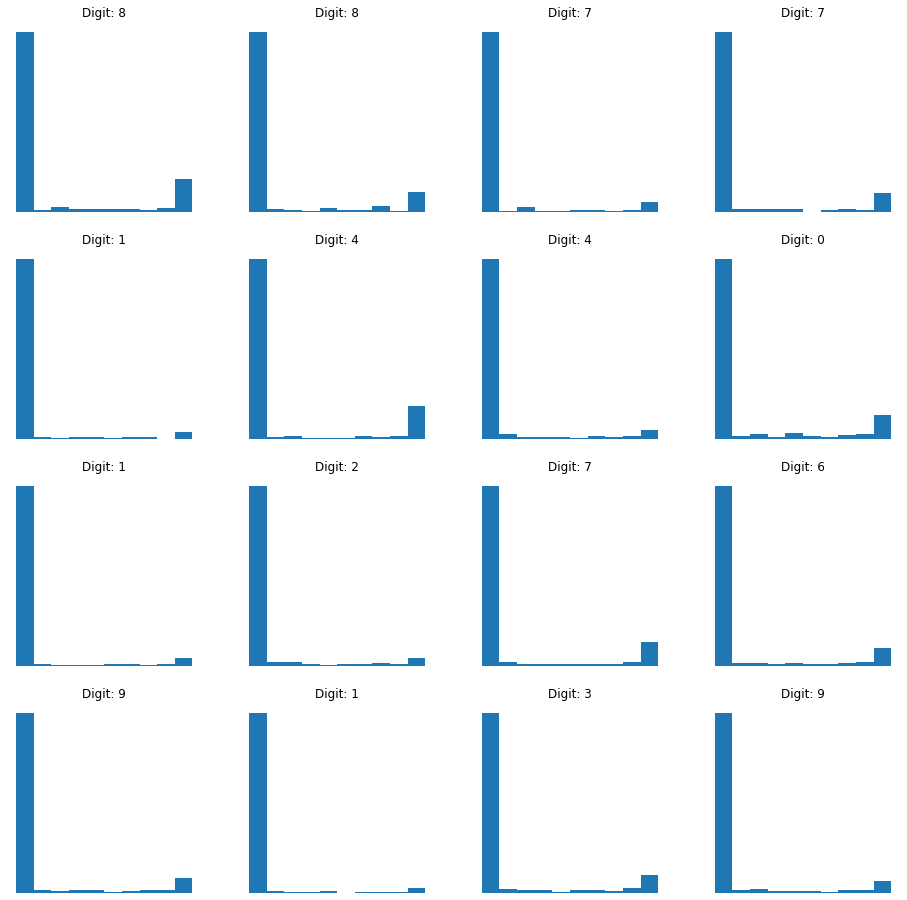

In [88]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis("off")
  j+=1

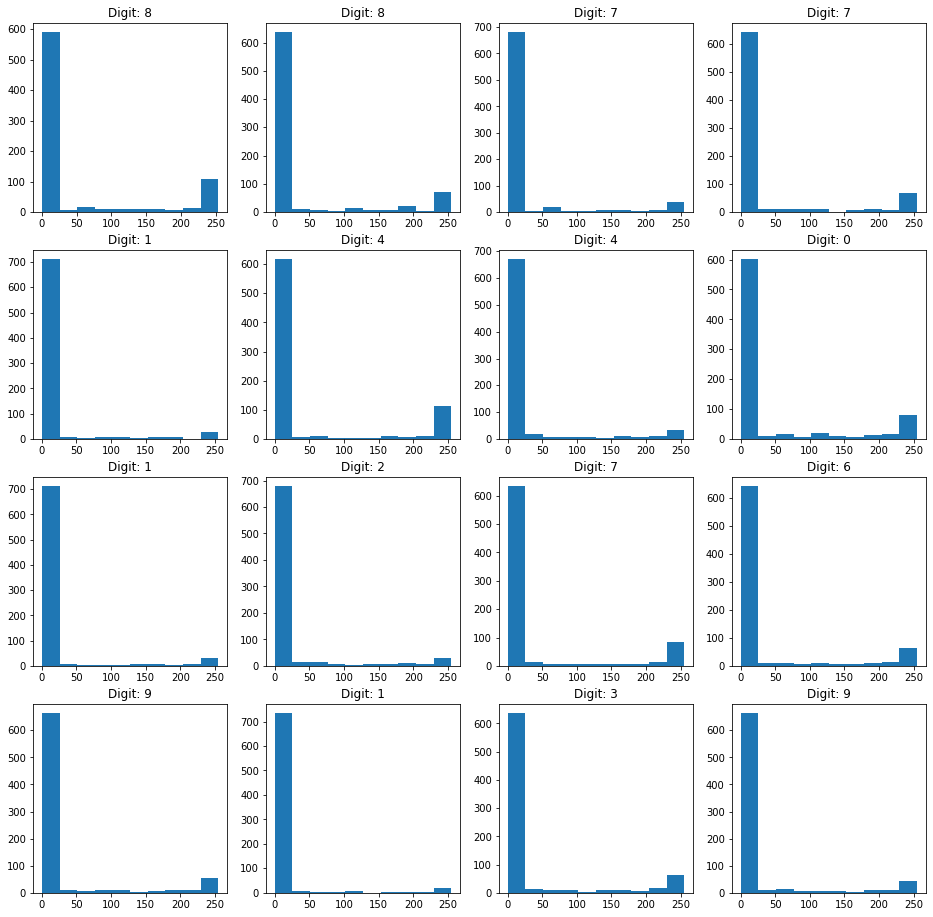

In [89]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit: "+str(train_labels[i]))
 # plt.axis("off")
  j+=1

# Preprocessing

### Scaling

In [90]:
## pixel  values are from 0 to 255
train_digits_sc = train_digits/255.0
test_digits_sc = test_digits/255.0

In [91]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [92]:
from keras.utils import to_categorical

In [93]:
train_labels_cat = to_categorical(train_labels)

In [94]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [95]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Split the train data to train and validation

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


## Build and Train the model

#### Build the model
We need to take 1d array as input for Dense layer<br>
How many Hidden layers you want to add here?<br>
How many neurons in each hidden layer?<br>
What is activation function for the hidden layers?<br>
How many neurons we should take in the output layer?<br>
What is the activation function for the output layer<br>

In [97]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [98]:
## We are creating the base model
model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

### Compile the model<br>
What is the loss function?<br>
What is the optimizer?<br>
what are the metrics?<br>

In [99]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

# Training the model

In [100]:
history=model.fit(x=X_train,y=y_train,epochs=10,\
          validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 105us/step - loss: 0.2545 - accuracy: 0.9216 - val_loss: 0.1725 - val_accuracy: 0.9478
Epoch 2/10
54000/54000 [==============================] - 5s 102us/step - loss: 0.1149 - accuracy: 0.9653 - val_loss: 0.1190 - val_accuracy: 0.9672
Epoch 3/10
54000/54000 [==============================] - 5s 101us/step - loss: 0.0796 - accuracy: 0.9756 - val_loss: 0.1159 - val_accuracy: 0.9677
Epoch 4/10
54000/54000 [==============================] - 5s 101us/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.1033 - val_accuracy: 0.9720
Epoch 5/10
54000/54000 [==============================] - 5s 101us/step - loss: 0.0536 - accuracy: 0.9831 - val_loss: 0.1136 - val_accuracy: 0.9695
Epoch 6/10
54000/54000 [==============================] - 6s 102us/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.1076 - val_accuracy: 0.9722
Epoch 7/10
54000/54000 [==============================] - 6s 10

# Evaluating the model

In [101]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 28us/step


[0.08555738586522056, 0.9782999753952026]

In [102]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [103]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.1451757e-16, 1.9658195e-11, 3.0606659e-09, 3.2174999e-10,
        1.8645903e-11, 1.3299351e-14, 1.2202650e-19, 1.0000000e+00,
        1.9661195e-11, 4.7163451e-09]], dtype=float32)

In [104]:
model.predict(test_digits_sc[:10])

array([[3.14516383e-16, 1.96581206e-11, 3.06066017e-09, 3.21750598e-10,
        1.86458314e-11, 1.32993507e-14, 1.22026033e-19, 1.00000000e+00,
        1.96611963e-11, 4.71633665e-09],
       [6.78356815e-11, 6.34482328e-11, 1.00000000e+00, 2.25592526e-12,
        1.12989951e-09, 6.79299688e-14, 1.15764838e-08, 5.86430730e-12,
        2.79479528e-09, 2.41444095e-19],
       [1.36369110e-10, 9.99874473e-01, 3.74988485e-06, 3.63441224e-08,
        6.90375964e-06, 1.77337278e-09, 1.09659453e-07, 4.26185652e-05,
        7.20517783e-05, 1.87302640e-09],
       [9.99275386e-01, 6.33309227e-08, 5.38179127e-04, 7.57544512e-07,
        1.80277232e-06, 1.56318606e-07, 4.38814004e-06, 2.25977101e-06,
        5.67504503e-05, 1.20291130e-04],
       [5.62383384e-08, 4.29522697e-06, 4.90045636e-07, 4.06451797e-08,
        9.99776185e-01, 1.11881752e-06, 6.02003820e-06, 1.51210297e-05,
        3.30218381e-06, 1.93330765e-04],
       [1.88126356e-13, 9.99996066e-01, 4.08388559e-08, 3.30331290e-10,
   

In [105]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [106]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.1451757e-16, 1.9658195e-11, 3.0606659e-09, 3.2174999e-10,
        1.8645903e-11, 1.3299351e-14, 1.2202650e-19, 1.0000000e+00,
        1.9661195e-11, 4.7163451e-09]], dtype=float32)

In [107]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [108]:
history.history

{'accuracy': [0.92164814,
  0.96529627,
  0.97555554,
  0.9794074,
  0.98307407,
  0.9857037,
  0.98705554,
  0.98933333,
  0.9906296,
  0.9911482],
 'loss': [0.2545107076082517,
  0.11488417095380525,
  0.07957259142022856,
  0.06626839306250353,
  0.053626044027352084,
  0.04512395053499602,
  0.040092728650212475,
  0.03406633290736957,
  0.029711840891551995,
  0.028393787880625396],
 'val_accuracy': [0.9478333592414856,
  0.9671666622161865,
  0.9676666855812073,
  0.972000002861023,
  0.9695000052452087,
  0.9721666574478149,
  0.9729999899864197,
  0.9754999876022339,
  0.9706666469573975,
  0.9768333435058594],
 'val_loss': [0.17245072840154171,
  0.11904864161026975,
  0.11593842479027808,
  0.10326538987488797,
  0.11361862318372974,
  0.10759024619186917,
  0.11004455170454458,
  0.10662598117107215,
  0.11697628896217793,
  0.09864790492799753]}

In [109]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

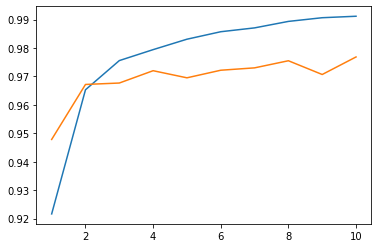

In [111]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])
